
# Requesting cutouts of AIA images from the JSOC

This example shows how to request a cutout of a series of
AIA images from the JSOC.


In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch

import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

As this is an example, we have already worked out where
we need to crop for the active region we want to showcase.



In [2]:
def load_data():
    data=pd.read_csv("./data/Jet_clusters_3.0_2.0_paperID.csv", sep=",")
    data.columns=data.columns.str.strip()
    data=data.drop(columns="velocity")

    return data

In [3]:
def get_image(start_time, duration, bottom_x, bottom_y):
    
    data=data.reset_index()
    dates=data["date"]
    
    for i,date in enumerate(dates):
        
        start_time = Time(date, scale='utc', format='isot') #“CCYY-MM-DDThh:mm:ss[.sss. . . ]”, Coordinated Universal Time (UTC), 

        bottom_x=data["basepoint_X_longitude"][i]  # I am not sure this is right
        bottom_y=data["basepoint_Y_latitude"][i]   # same

        duration=data["duration"][i]

        bottom_left = SkyCoord(bottom_x*u.arcsec, bottom_y*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
        top_right = SkyCoord((bottom_x+300)*u.arcsec, (bottom_y+300)*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

        jsoc_email = "adrien.joliat@epfl.ch"

        cutout = a.jsoc.Cutout(bottom_left=bottom_left, top_right=top_right, tracking=True)

        query = Fido.search(
            a.Time(start_time , start_time + duration*u.min), #duration is in min
            a.Wavelength(304*u.angstrom),
            a.Sample(12*u.s), #one image /12 s --> 5images per min
            a.jsoc.Series.aia_lev1_euv_12s,
            a.jsoc.Notify(jsoc_email),
            a.jsoc.Segment.image,
            cutout,
        )
        files = Fido.fetch(query)
        files.sort()
    return files

In [5]:
start_time = Time('2011-01-20T09:15:44', scale='utc', format='isot')
bottom_left = SkyCoord(-500*u.arcsec, -275*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right = SkyCoord(150*u.arcsec, 375*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

# Now construct the cutout from the coordinates aboveabove using the `~sunpy.net.jsoc.attrs.Cutout` attribute.
cutout = a.jsoc.Cutout(bottom_left, top_right=top_right, tracking=True)

Now we are ready to construct the query. Note that all of this is
the same for a full-frame image except for the
cutout component. We will download images from a 12 hour interval
centered on the time of the above cutout.
We request one image every 2 hours.



In [6]:
jsoc_email = "carlos.colladocapell@epfl.ch"

query = Fido.search(
    a.Time(start_time - 6*u.h, start_time + 6*u.h),
    a.Wavelength(304*u.angstrom),
    a.Sample(2*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    cutout,
)
print(query)

Results from 1 Provider:

7 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2011-01-20T03:15:38Z  SDO/AIA    AIA_4      304    2105
2011-01-20T05:15:38Z  SDO/AIA    AIA_4      304    2105
2011-01-20T07:15:38Z  SDO/AIA    AIA_4      304    2105
2011-01-20T09:15:38Z  SDO/AIA    AIA_4      304    2105
2011-01-20T11:15:38Z  SDO/AIA    AIA_4      304    2106
2011-01-20T13:15:38Z  SDO/AIA    AIA_4      304    2106
2011-01-20T15:15:38Z  SDO/AIA    AIA_4      304    2106




Submit the export request and download the data.



In [7]:
files = Fido.fetch(query)
files.sort()

Export request pending. [id=JSOC_20231114_3318, status=2]
Waiting for 0 seconds...
7 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/7 [00:00<?, ?file/s]

Now that we've downloaded the files, we can create
a `~sunpy.map.MapSequence` from them and animate
them.



In [8]:
import shutil
import os


# The source file path
source_file = files[0]

# The destination directory
destination_dir = "./data"

# Ensure the destination directory exists, create it if not
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Construct the destination file path
destination_file = os.path.join(destination_dir, os.path.basename(source_file))

# Copy the file
shutil.copy(source_file, destination_file)


'./data/aia.lev1_euv_12s.2011-01-20T031538Z.304.image.fits'

In [9]:
files[0]

'/Users/carloscc/sunpy/data/aia.lev1_euv_12s.2011-01-20T031538Z.304.image.fits'

In [10]:
from astropy.io import fits

file_path = '/Users/carloscc/Library/CloudStorage/OneDrive-epfl.ch/Fall 2023/CS-433 Machine learning/GitHub/Projects/Project 2/data/aia.lev1_euv_12s.2011-01-20T031538Z.304.image.fits'
# Open the FITS file
with fits.open(files[0]) as hdul:
    # Access the data in the second HDU (index 1)
    npfile = hdul[1].data

# Check the type of 'data' to confirm it's a NumPy array and view its shape
data_type = type(npfile)
data_shape = npfile.shape if npfile is not None else "Data not found"

data_type, data_shape


(numpy.ndarray, (1084, 1084))

In [12]:
files[0]

'/Users/carloscc/sunpy/data/aia.lev1_euv_12s.2011-01-20T031538Z.304.image.fits'

In [11]:
npfile

array([[ 69,  54,  47, ...,  38,  41,  36],
       [ 71,  63,  60, ...,  32,  47,  40],
       [ 62,  62,  69, ...,  41,  41,  40],
       ...,
       [ 70,  76,  66, ..., 220, 236, 185],
       [ 61,  64,  65, ..., 201, 247, 235],
       [ 52,  58,  64, ..., 174, 216, 236]], dtype=int16)

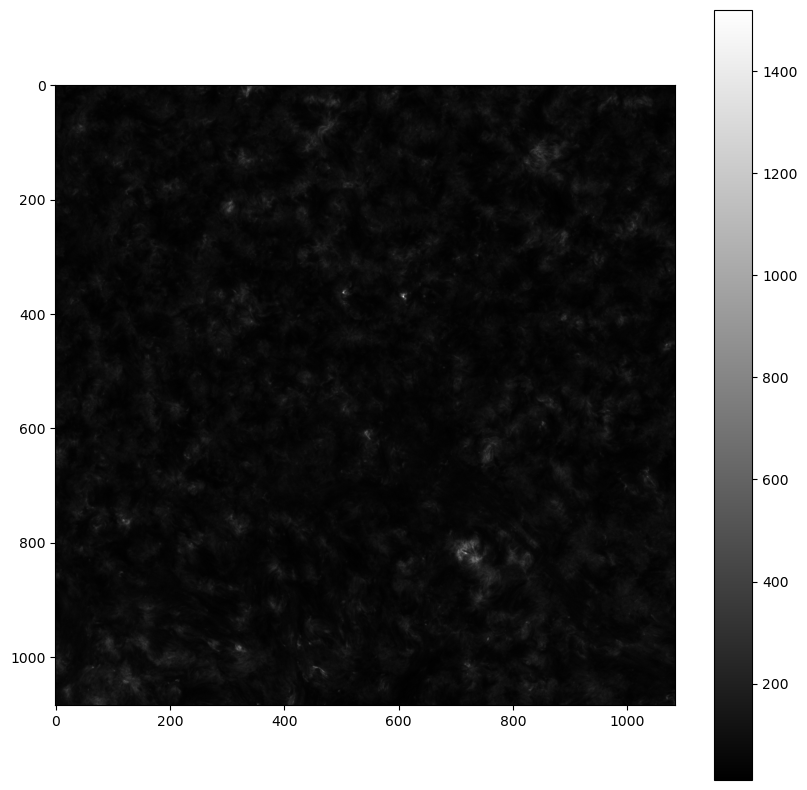

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(npfile, cmap='gray')
plt.colorbar()
plt.show()


<sunpy.map.mapsequence.MapSequence object at 0x1283c4790>
MapSequence of 7 elements, with maps from AIAMap
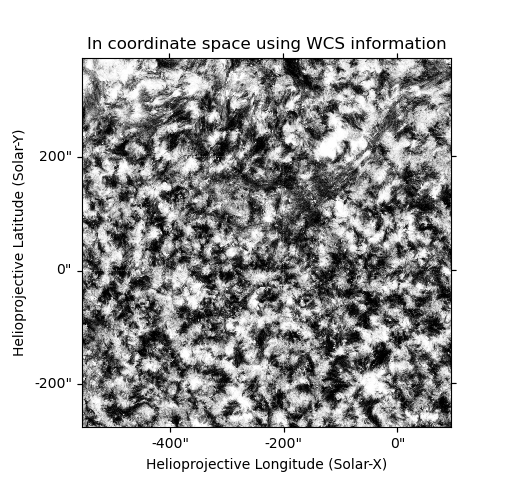
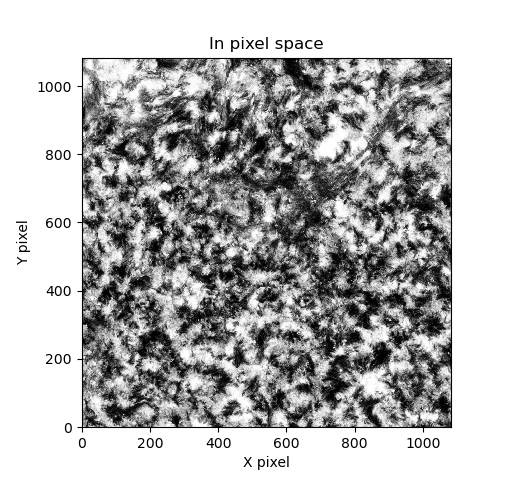
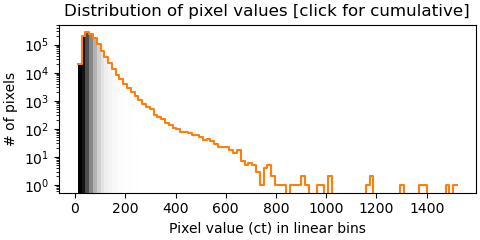
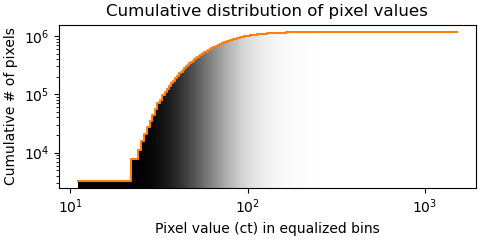
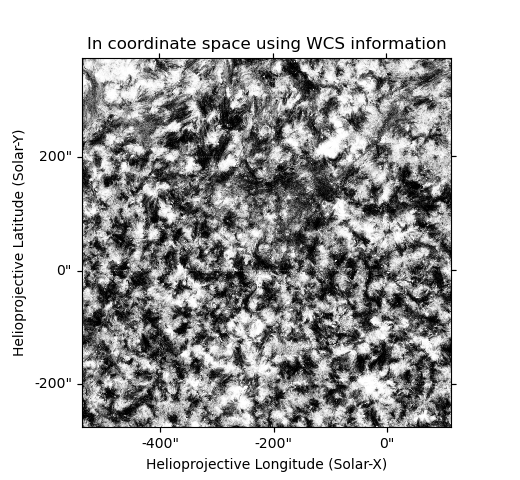
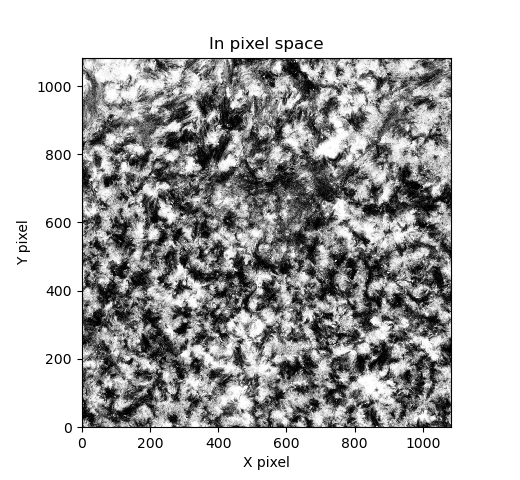
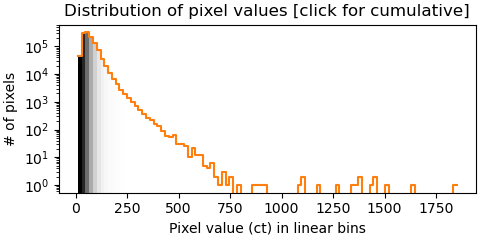
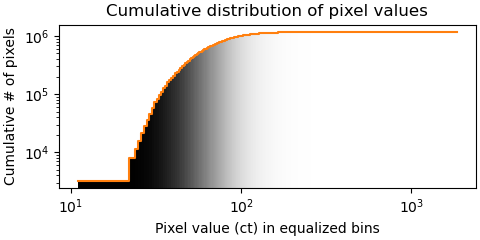
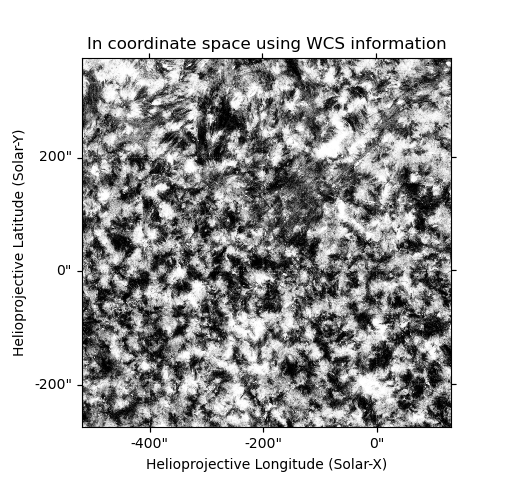
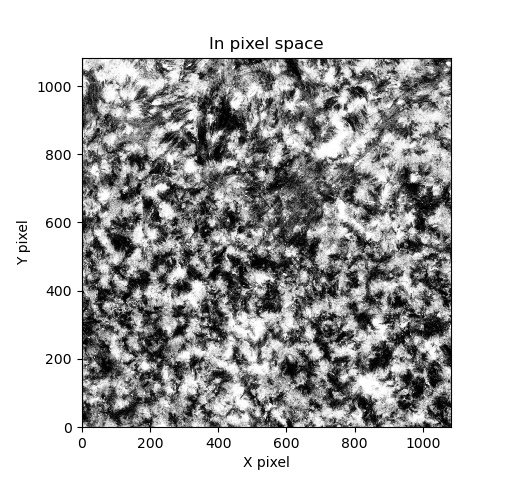
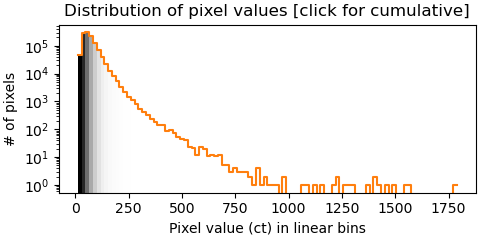
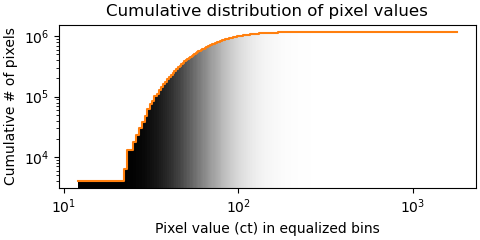
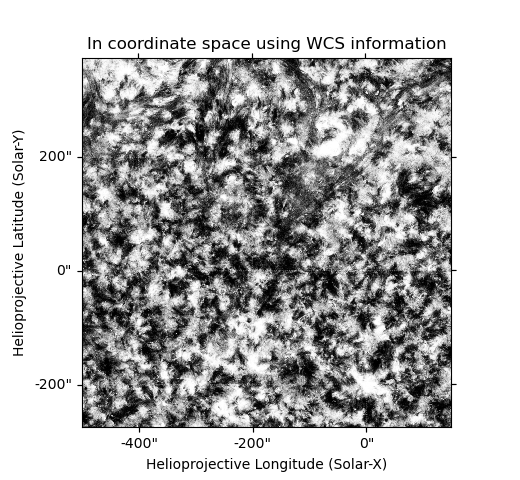
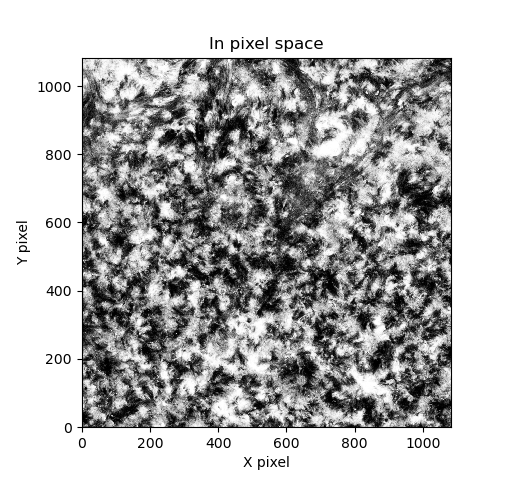
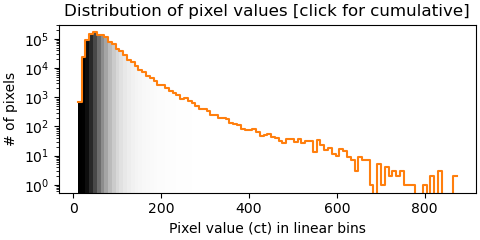
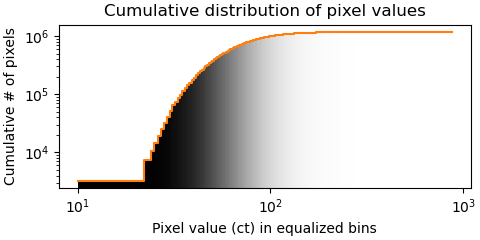
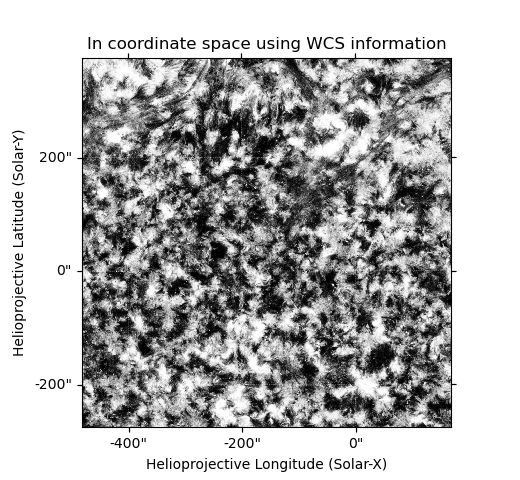
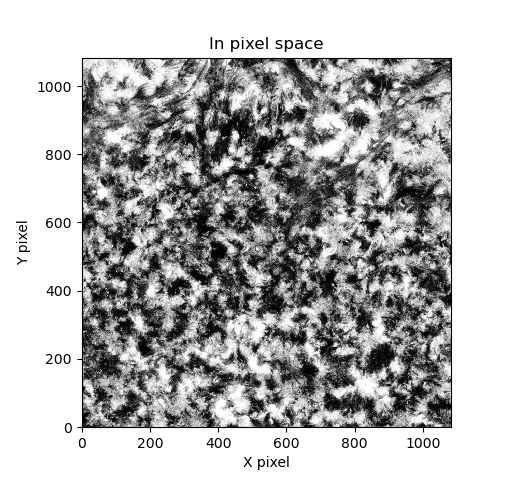
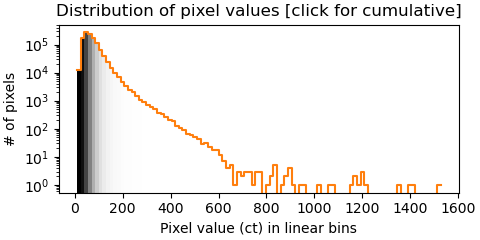
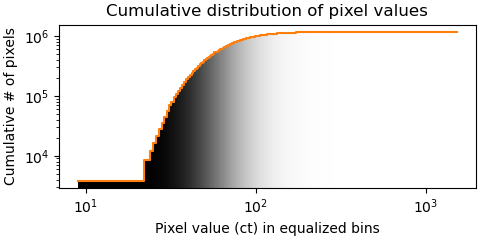
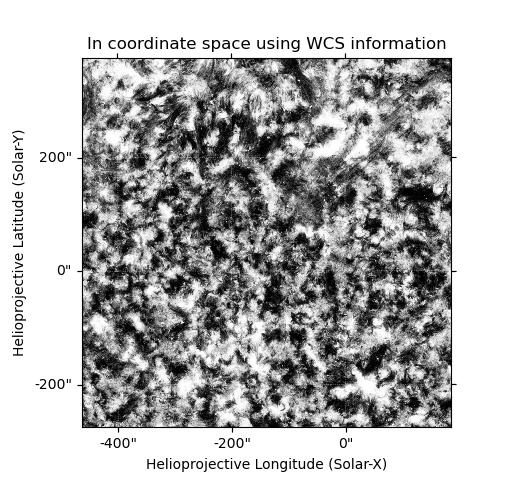
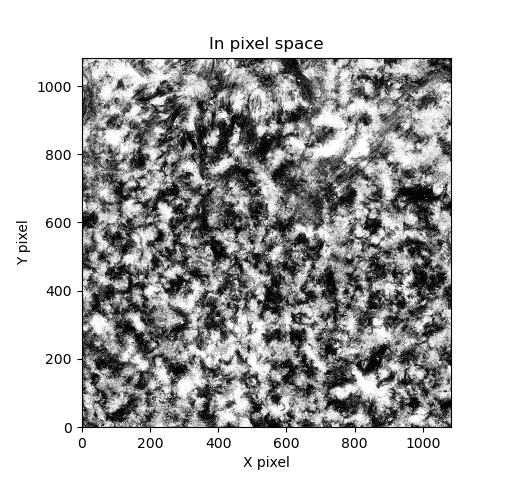
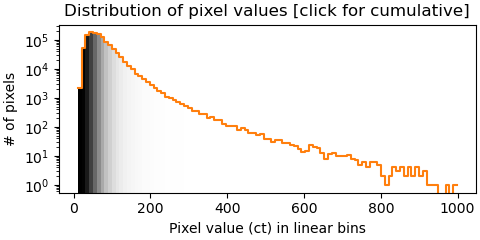
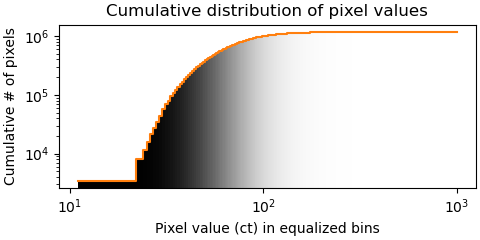
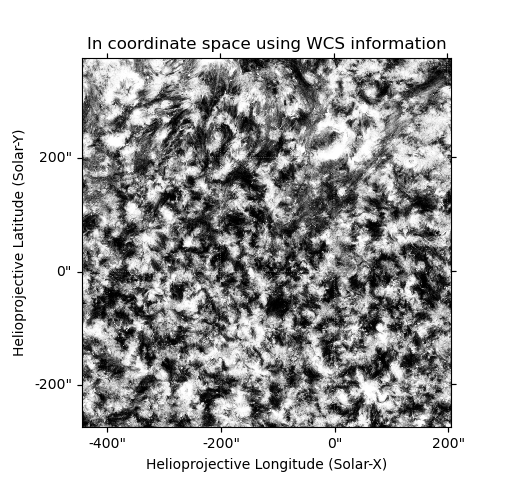
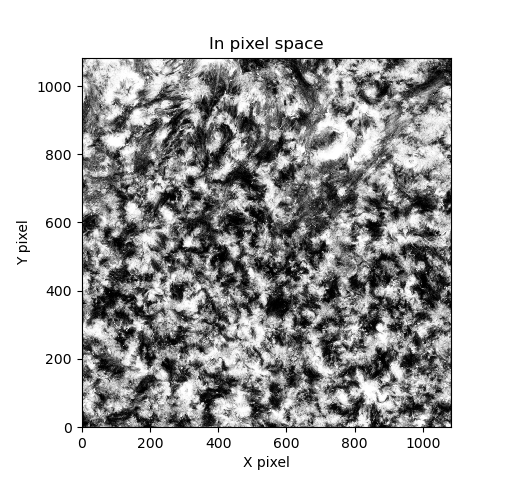
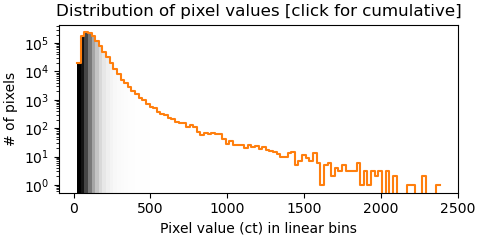
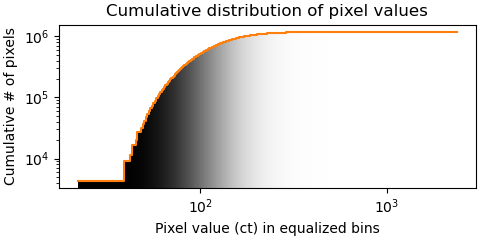

In [ ]:
sequence

In [ ]:
sequence = sunpy.map.Map(files, sequence=True)

fig = plt.figure()
#ax = fig.add_subplot(projection=sequence.maps[0])
ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))
#plt.show()

# Make this plot into a clickable animation in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

<Figure size 640x480 with 0 Axes>

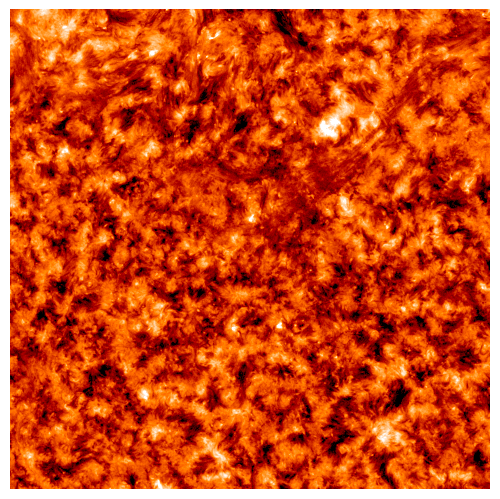

In [ ]:
import numpy as np
smap = sunpy.map.Map(files[0])
figure = plt.figure(frameon=False)
ax = plt.axes([0, 0, 1, 1])
# Disable the axis
ax.set_axis_off()

# Plot the map.
# Since we are not interested in the exact map coordinates,
# we can simply use :meth:`~matplotlib.Axes.imshow`.
norm = smap.plot_settings['norm']
norm.vmin, norm.vmax = np.percentile(smap.data, [1, 99.9])
ax.imshow(smap.data,
          norm=norm,
          cmap=smap.plot_settings['cmap'],
          origin="lower")

In [ ]:
print(sequence.maps[0])

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 4
Detector:		 AIA
Measurement:		 304.0 Angstrom
Wavelength:		 304.0 Angstrom
Observation Date:	 2011-01-20 03:15:44
Exposure Time:		 2.902165 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.60016501 0.60016501] arcsec / pix
Reference Pixel:	 [2053.22998 2037.20996] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[ 0, -1,  1, ...,  1,  0,  1],
       [ 0,  1,  0, ...,  2, -1,  1],
       [ 0,  0, -1, ...,  0,  2, -1],
       ...,
       [ 3,  2,  0, ..., -1,  0, -1],
       [ 0,  1,  0, ...,  1,  0, -1],
       [ 0,  0,  1, ...,  1, -2,  0]], dtype=int16)
